<a href="https://colab.research.google.com/github/Ghizaoui/IAD/blob/tp2/TPRN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#changement de dossier
import os
os.chdir("/content/data")
#importation des données
import pandas
dataframe = pandas.read_csv("Iris.csv")
#10 premières lignes
dataframe.head(10)
     

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [2]:
#3 les dimensions du dataframe
print(dataframe.shape)

(150, 6)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


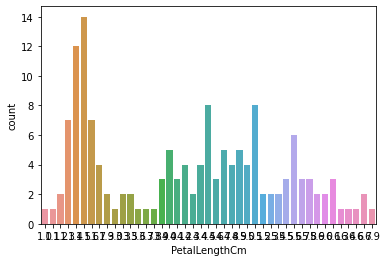

In [3]:
#4 Seaborm
import seaborn as sns
sns.countplot(dataframe["PetalLengthCm"])
#sns.kdeplot(data[col], shade=True)

In [4]:
#5 labelliser les différentes espèces d'iris
dataframe=dataframe.assign(Label=0)
for i in dataframe.index:
  if(dataframe["Species"][i]=="Iris-versicolor"):
    dataframe["Label"][i]=1;
  if(dataframe["Species"][i]=="Iris-virginica"):
    dataframe["Label"][i]=2;


<ipython-input-4-52ce9c79eeb0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Label"][i]=1;
<ipython-input-4-52ce9c79eeb0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Label"][i]=2;


In [5]:
6#
dataframe.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
5,6,5.4,3.9,1.7,0.4,Iris-setosa,0
6,7,4.6,3.4,1.4,0.3,Iris-setosa,0
7,8,5.0,3.4,1.5,0.2,Iris-setosa,0
8,9,4.4,2.9,1.4,0.2,Iris-setosa,0
9,10,4.9,3.1,1.5,0.1,Iris-setosa,0


In [6]:
#7
from sklearn.model_selection import train_test_split
df_labels = dataframe[['Label']];
df_features = dataframe[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]

X_train, X_test, y_train, y_test = train_test_split(df_features,df_labels, test_size=0.3, random_state=42)
print ("Train=" + str(X_train.shape) + ", Test=" + str(X_test.shape))

Train=(105, 4), Test=(45, 4)


In [7]:
#8
X_train.head(10)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


In [8]:
#8
y_test.head(10)


,Label
73,1
18,0
118,2
78,1
76,1
31,0
64,1
141,2
68,1
82,1


In [9]:
#9
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs',alpha=0.07, max_iter=150, random_state=0)


In [10]:
#10
from sklearn.metrics import accuracy_score
h1=mlp.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
print(accuracy_score(y_test, mlp.predict(X_test)))

1.0


In [11]:
#11
from sklearn import metrics

metrics.confusion_matrix(y_test, mlp.predict(X_test))


array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [12]:
#12
#commentaire


In [13]:
#13
mlp1 = MLPClassifier(solver='lbfgs',alpha=0.7, max_iter=150, random_state=0)
h2=mlp1.fit(X_train,y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [14]:
#14
import matplotlib.pyplot as plt

history_df = pandas.DataFrame(h1)
history_df.loc[:,['accuracy','val_accuracy']].plot()
history_df = pandas.DataFrame(h2)
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

ValueError: ignored